In [38]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [3]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
def plot_hist_boxplot(df):
    '''
    Accepts only numerical columns;
    use a maks.
    '''
    dim = df.shape[1]
    plt.figure(figsize=(20, dim*5))
    
    # iterate through the columns
    for i, column in enumerate(df.columns):
        
        # plot a histogram
        plt.subplot(dim, 2, (i+1)*2-1)
        plt.hist(df[column])
        plt.ylabel(column)
        
        # plot a boxplot
        plt.subplot(dim, 2, (i+1)*2)
        plt.boxplot(df[column], whis=[5, 95]) # boxplot will show outliers beyond the inner 90th percentile
    plt.show()

In [4]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [12]:
df.shape

(8147, 13)

In [6]:
## Target Variable is partner
# The data dictionary specifies that a value of 1 indicates someone lives with a partner and a value of 2
# indicates that they live alone
df['partner'].unique()

array([1., 2.])

In [11]:
#
df[df['partner'] == 2].head(20)# the classes are relatively ballanced
df[df['partner'] == 2].shape

(3134, 13)

In [18]:
# encode the variable as binary, leave the 1's intact and change 2 to 0
df.loc[df['partner'] == 2, 'partner'] = 0

In [19]:
df['partner'].unique()

array([1., 0.])

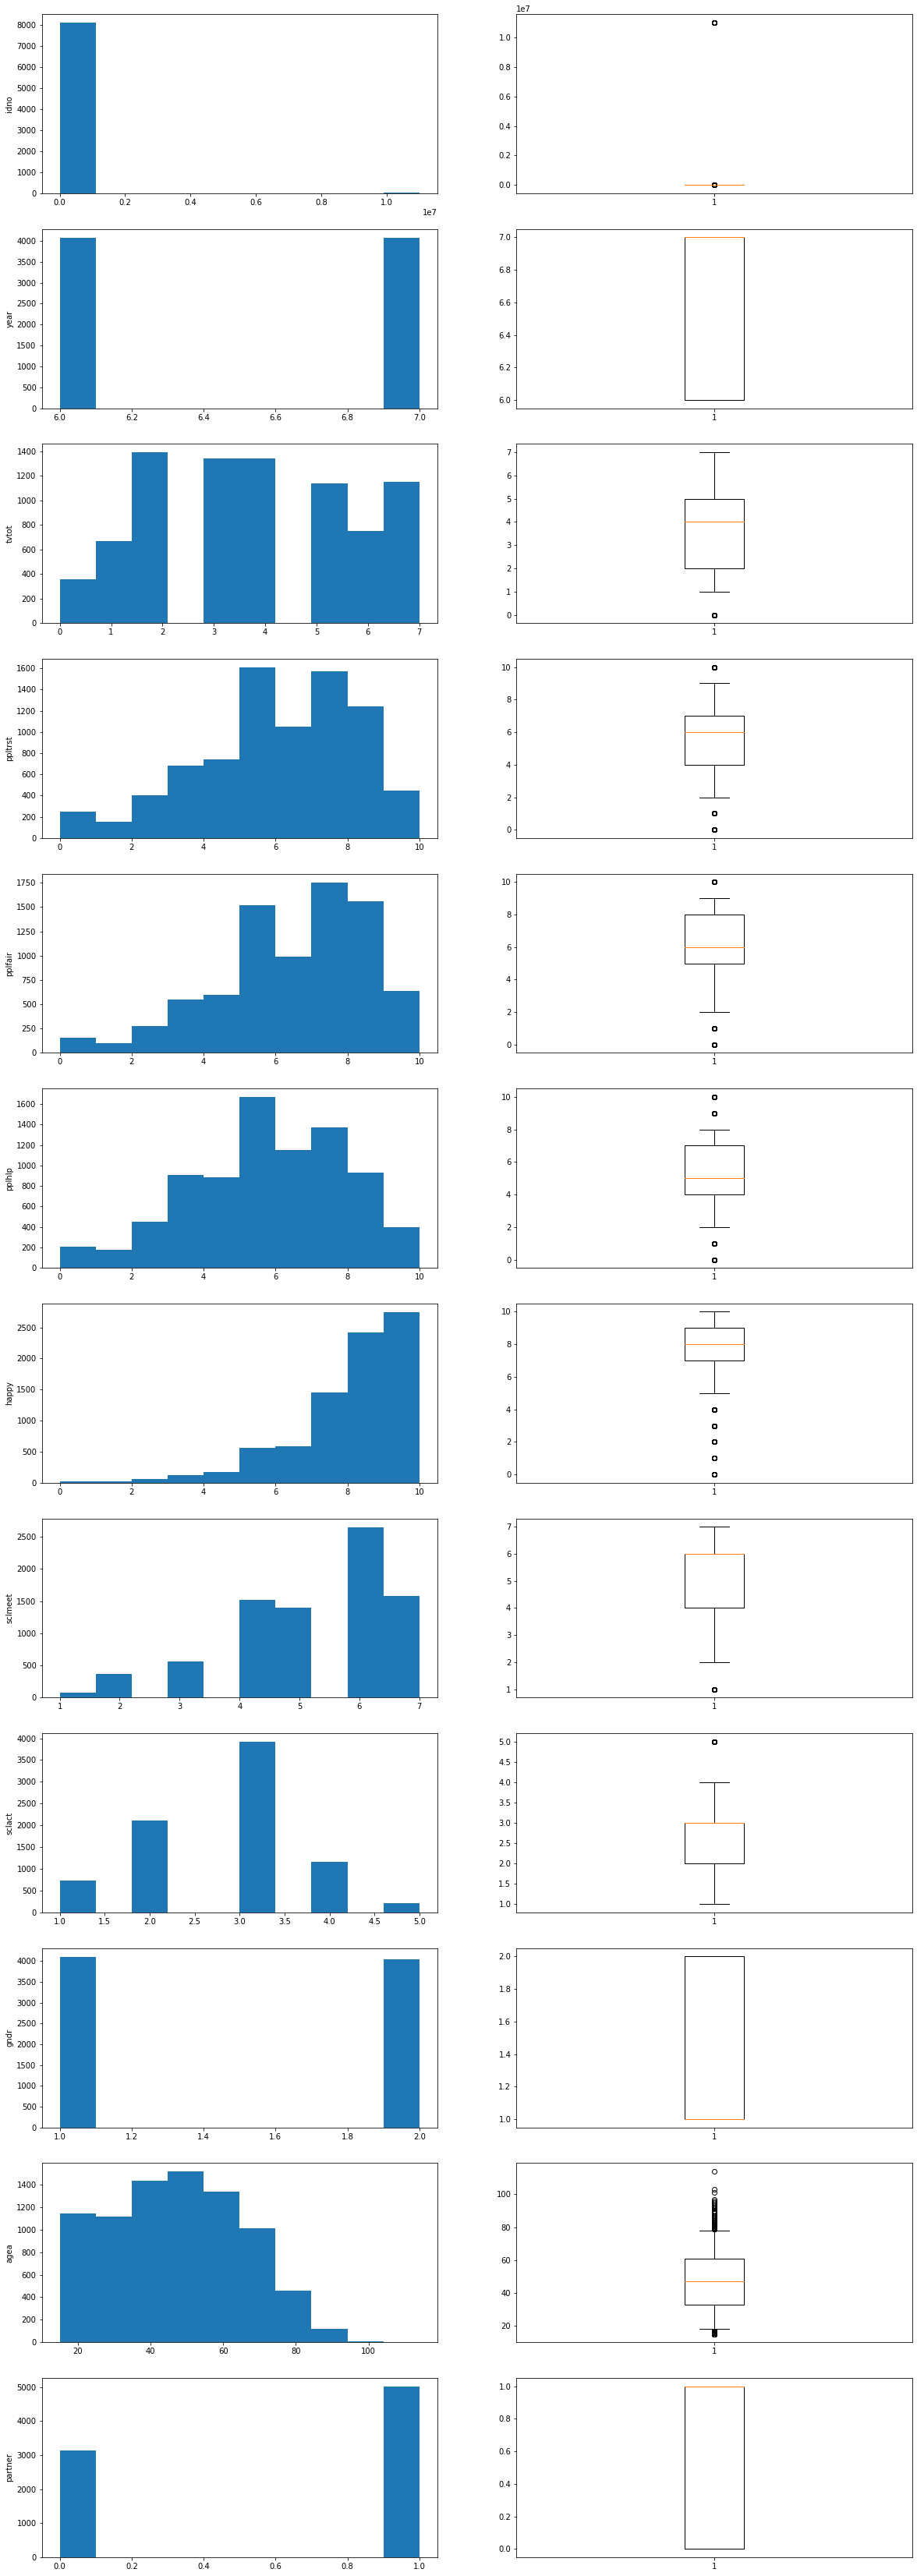

In [22]:
plot_hist_boxplot(df.select_dtypes(include='number'))

In [24]:
df.drop(['idno', 'year'], axis=1, inplace=True)

In [28]:
df['tvtot'].value_counts()

2.0    1391
4.0    1344
3.0    1344
7.0    1149
5.0    1140
6.0     751
1.0     671
0.0     357
Name: tvtot, dtype: int64

In [33]:
# clean up the gender variable

mask = df['gndr'] == 2
df.loc[mask, 'is_female'] = 1
mask = df['gndr'] == 1
df.loc[mask, 'is_female'] = 0
df['is_female'].value_counts()

0.0    4103
1.0    4044
Name: is_female, dtype: int64

In [40]:
X = df.drop(['partner', 'cntry'], axis=1)
X = pd.concat([X, pd.get_dummies(df['cntry'], drop_first=True)], axis=1)
y = df['partner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)

### 1.

In [41]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Confusion matrix, without normalization
Accuracy : 0.738831615120275

 -------------------------------------------------- 
 Precision : 0.7201034259857789

 -------------------------------------------------- 
 Recall : 0.9183841714756801


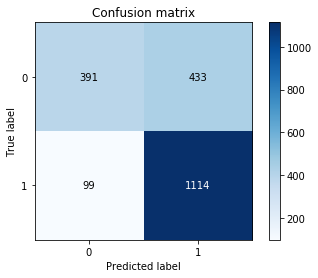

In [48]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

### 2. 

In [49]:
# very simple changes double the tree depth and number of estimators

params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Confusion matrix, without normalization
Accuracy : 0.7206676485027

 -------------------------------------------------- 
 Precision : 0.7264416315049227

 -------------------------------------------------- 
 Recall : 0.8516075845012366


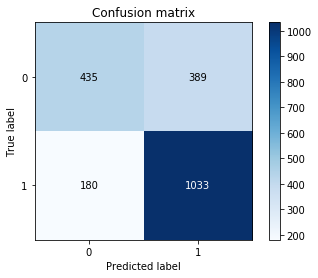

In [50]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

### 3

In [82]:
# include a subsample paramater

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'
         , 'subsample' : .4}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Confusion matrix, without normalization
Accuracy : 0.7437407952871871

 -------------------------------------------------- 
 Precision : 0.727452271231073

 -------------------------------------------------- 
 Recall : 0.910964550700742


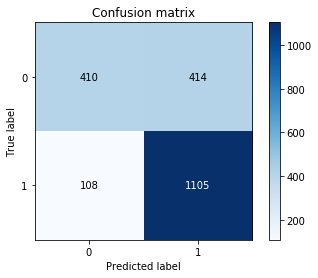

In [83]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

### 4.

In [100]:
params = {'n_estimators': 200,
          'max_depth': 1,
          'loss': 'deviance'}

# Initialize and fit the modelexponential.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Confusion matrix, without normalization
Accuracy : 0.7398134511536574

 -------------------------------------------------- 
 Precision : 0.7101538461538461

 -------------------------------------------------- 
 Recall : 0.9513602638087386


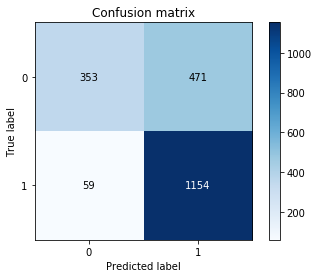

In [101]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

### 5.

In [104]:
params = {'n_estimators': 300,
          'max_depth': 1,
          'loss': 'deviance'}

# Initialize and fit the modelexponential.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Confusion matrix, without normalization
Accuracy : 0.7442317133038783

 -------------------------------------------------- 
 Precision : 0.7165206508135169

 -------------------------------------------------- 
 Recall : 0.9439406430338005


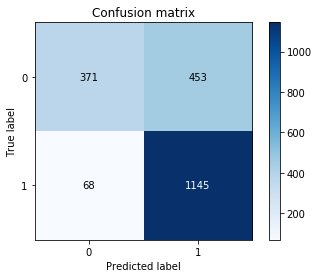

In [105]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

There is a persistant issue with percision. Maybe the data still has too much noise? Lets revisit the data and clean it up some more.

In [108]:
feature_importance = clf.feature_importances_

In [118]:
ranked = np.argsort(-1*feature_importance)
pd.DataFrame(X.columns[ranked], feature_importance[ranked])


,0
0.831712,agea
0.098260,happy
0.033593,sclmeet
0.015660,tvtot
0.007310,sclact
0.004132,pplfair
0.002294,ppltrst
0.002201,CZ
0.001957,pplhlp
0.001731,is_female


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cntry      8147 non-null   object 
 1   tvtot      8147 non-null   float64
 2   ppltrst    8147 non-null   float64
 3   pplfair    8147 non-null   float64
 4   pplhlp     8147 non-null   float64
 5   happy      8147 non-null   float64
 6   sclmeet    8147 non-null   float64
 7   sclact     8147 non-null   float64
 8   gndr       8147 non-null   float64
 9   agea       8147 non-null   float64
 10  partner    8147 non-null   float64
 11  is_female  8147 non-null   float64
dtypes: float64(11), object(1)
memory usage: 827.4+ KB


In [220]:
X = df.drop(['cntry', 'gndr', 'partner'], axis=1)

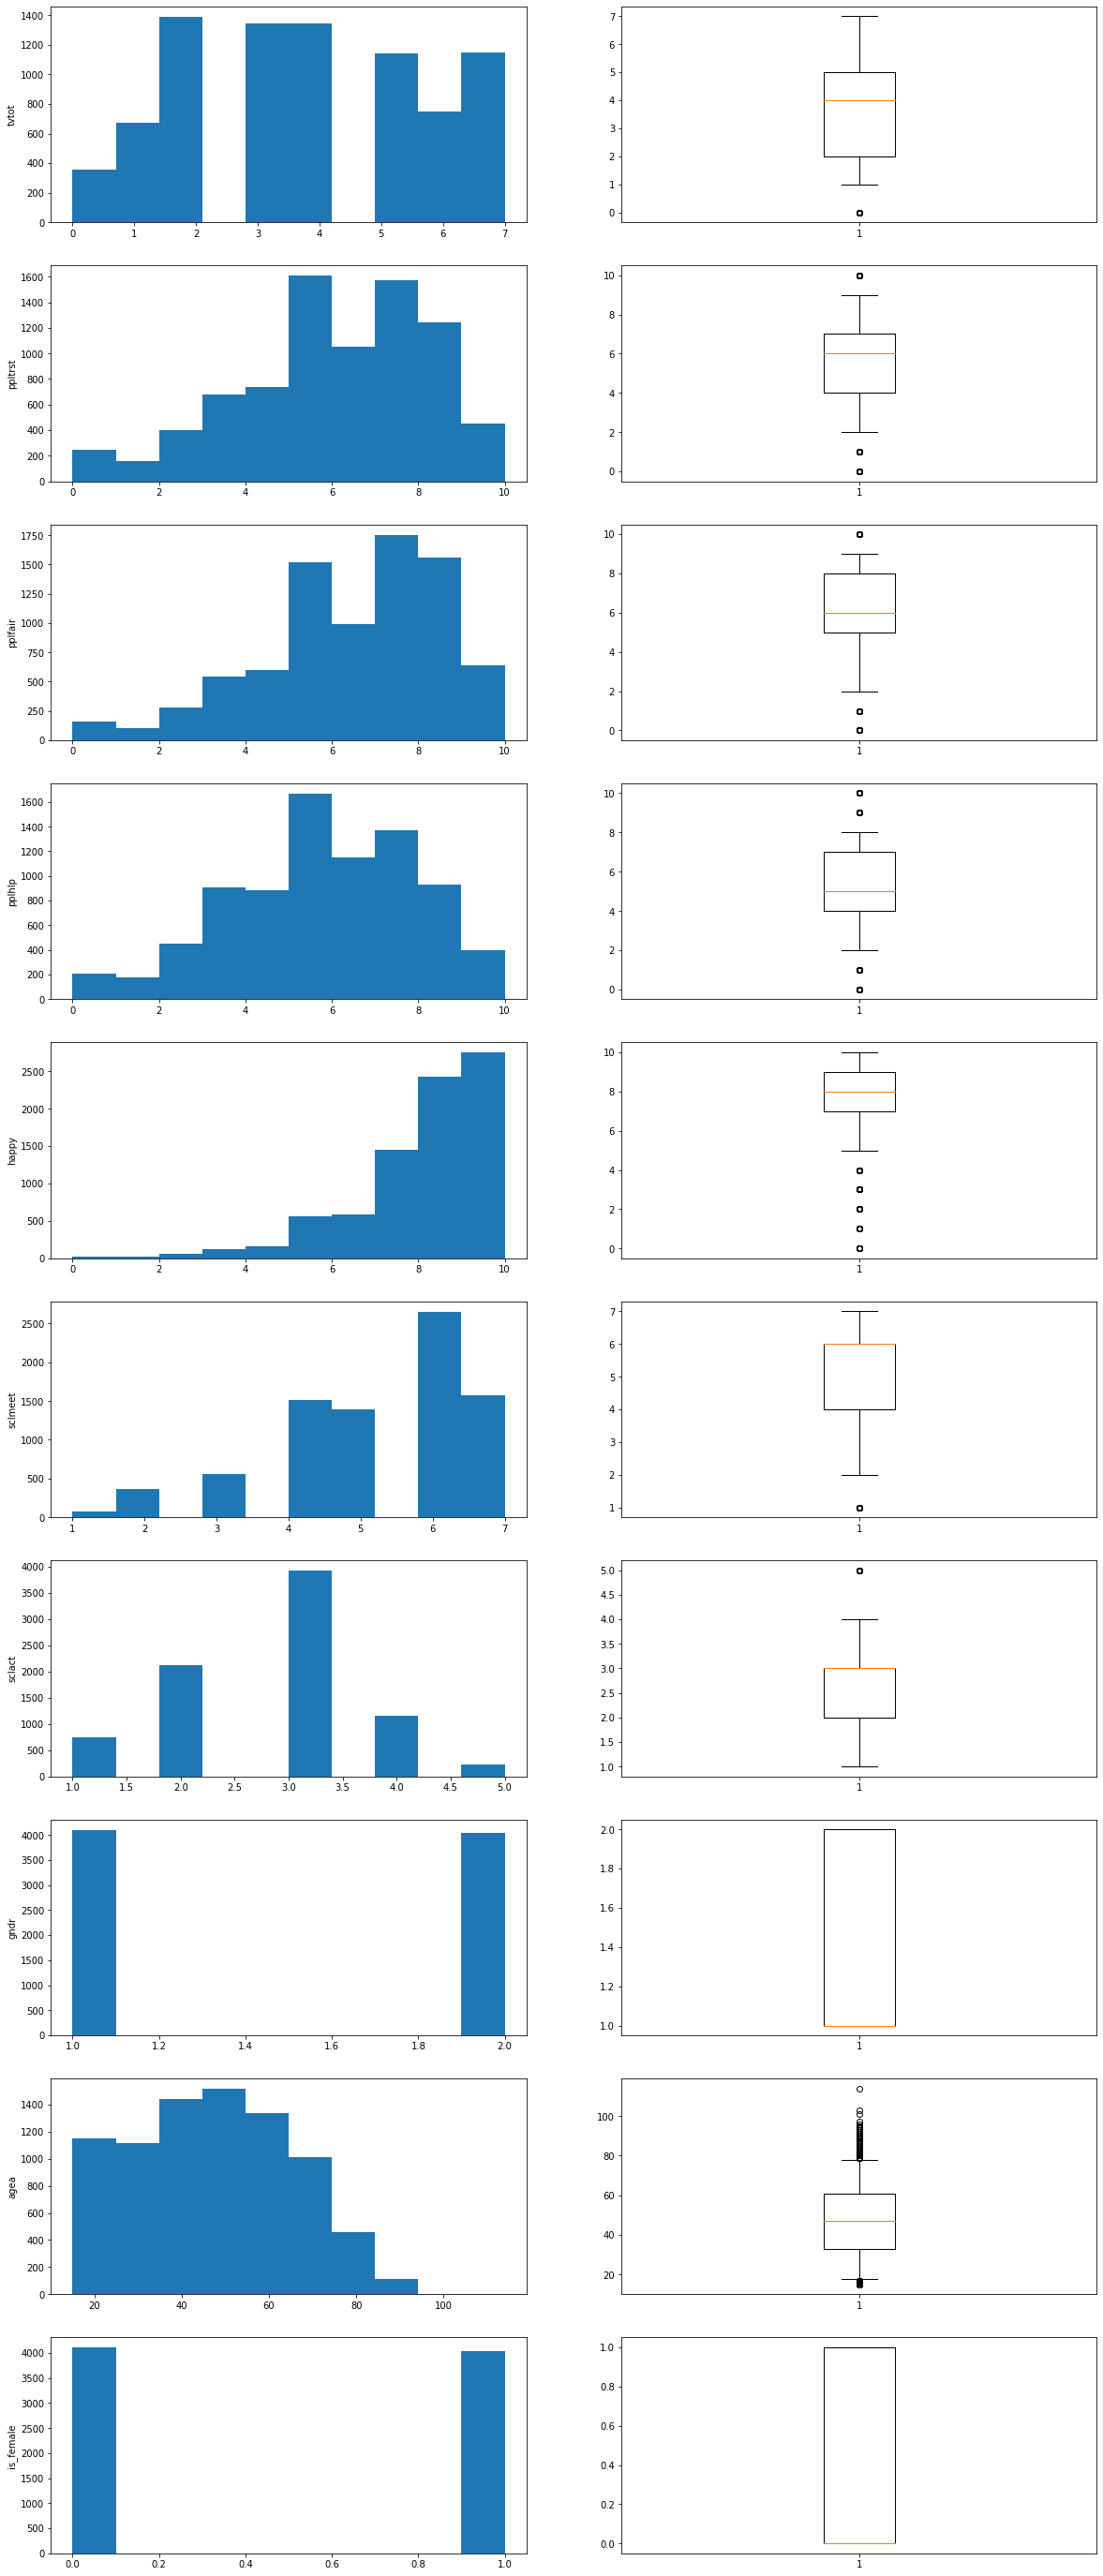

In [169]:
plot_hist_boxplot(X)

In [123]:
def print_outliers(lower_inner_upper, df):
    
    if lower_inner_upper == 'lower':
        
        print('Continuious Variables', '\n')

        for column in df.select_dtypes(include='number'):
            print(column)
            for threshold in [95, 90, 85, 80, 75]:
                lower_bound = np.percentile(df[column], [100-threshold])[0]
                
                print('Beyond the upper {}th percentile there are {} outliers'.format(threshold, 
                    len((np.where((df[column] < lower_bound))[0]))
                ))
                
            if (df[column].nunique() < 5):
                print('\n')
                print('Possible Categorical Variable')
                print('There are {} unique values'.format(df[column].nunique()))
                print(df[column].value_counts())
            print('\n')
    
    elif lower_inner_upper == 'inner':
        
        print('Continuious Variables', '\n')
    
        for column in df.select_dtypes(include='number'):
            print(column)
            for threshold in [95, 90, 85, 80, 75]:
                alpha = 100 - threshold
                upper_bound, lower_bound = np.percentile(df[column]
                                                         , [(100 - alpha/2), (0 + alpha/2)]) 

                print("Beyond the inner {}th percentile there are {} outliers.".format(threshold,
                        len((np.where((df[column] > upper_bound) 
                                      | (df[column] < lower_bound))[0]))
                    ))

            if (df[column].nunique() < 5):
                print('\n')
                print('Possible Categorical Variable')
                print('There are {} unique values'.format(df[column].nunique()))
                print(df[column].value_counts())
            print('\n')
            
    elif lower_inner_upper == 'upper':
    
        print('Continuious Variables', '\n')

        for column in df.select_dtypes(include='number'):
            print(column)
            for threshold in [95, 90, 85, 80, 75]:
                upper_bound = np.percentile(df[column], [threshold])[0]
                
                print('Beyond the lower {}th percentile there are {} outliers'.format(threshold, 
                    len((np.where((df[column] > upper_bound))[0]))
                ))
                
            if (df[column].nunique() < 5):
                print('\n')
                print('Possible Categorical Variable')
                print('There are {} unique values'.format(df[column].nunique()))
                print(df[column].value_counts())
            print('\n')
        
        
    
    print('Categorical Variables', '\n')
    
    for column in df.select_dtypes(include='object'):
        print(column)
        print('There are {} unique values'.format(df[column].nunique()))
        print(df[column].value_counts())
        print('\n')

In [155]:
print_outliers('lower', X.loc[:, ~X.columns.isin(['agea', 'gndr'])])

Continuious Variables 

tvtot
Beyond the upper 95th percentile there are 357 outliers
Beyond the upper 90th percentile there are 357 outliers
Beyond the upper 85th percentile there are 1028 outliers
Beyond the upper 80th percentile there are 1028 outliers
Beyond the upper 75th percentile there are 1028 outliers


ppltrst
Beyond the upper 95th percentile there are 404 outliers
Beyond the upper 90th percentile there are 806 outliers
Beyond the upper 85th percentile there are 806 outliers
Beyond the upper 80th percentile there are 1485 outliers
Beyond the upper 75th percentile there are 1485 outliers


pplfair
Beyond the upper 95th percentile there are 260 outliers
Beyond the upper 90th percentile there are 540 outliers
Beyond the upper 85th percentile there are 1086 outliers
Beyond the upper 80th percentile there are 1086 outliers
Beyond the upper 75th percentile there are 1683 outliers


pplhlp
Beyond the upper 95th percentile there are 383 outliers
Beyond the upper 90th percentile ther

In [147]:
X.shape

(8147, 9)

In [221]:
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox

In [224]:

for column in ['agea', 'pplhlp', 'pplfair', 'ppltrst']:
    X[column] = winsorize(X[column], (0.05, 0.05))

for column in ['sclact']:
    X[column] = winsorize(X[column], (0, 0.05))

for column in ['tvtot', 'happy', 'sclmeet']:
    X[column] = winsorize(X[column], (0.05, 0))

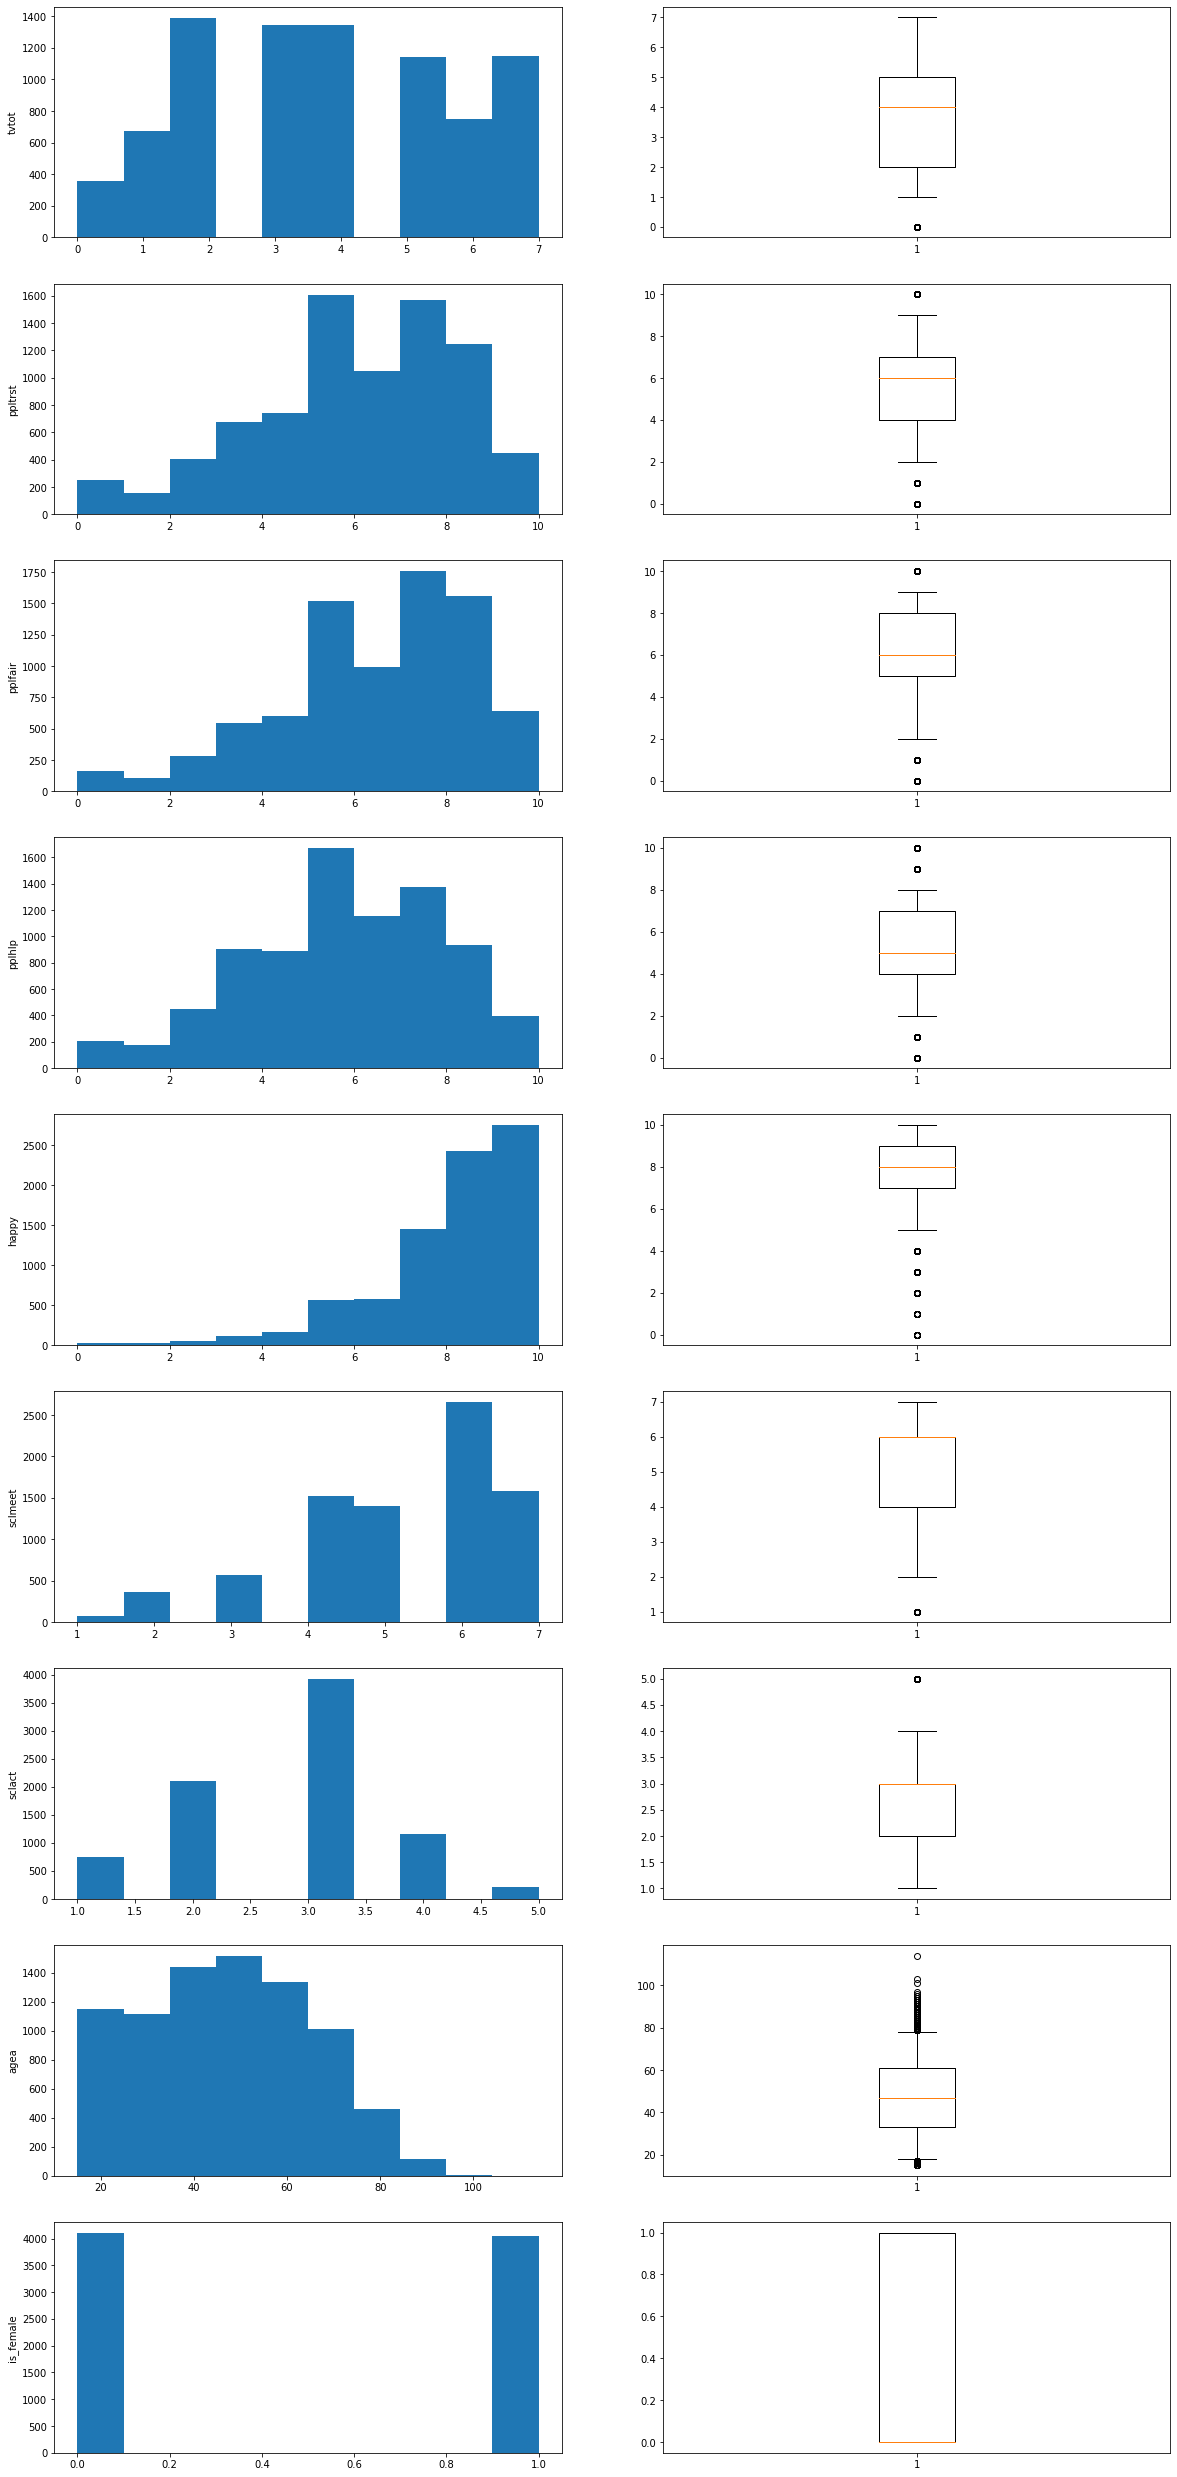

In [223]:
plot_hist_boxplot(X)

### 6. Try again with cleaner data

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)

params = {'n_estimators': 400,
          'max_depth': 1,
          'loss': 'deviance',
         'learning_rate': .1,
         'warm_start': True}

# Initialize and fit the modelexponential.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix
Accuracy : 0.7383406971035837

 -------------------------------------------------- 
 Precision : 0.7127659574468085

 -------------------------------------------------- 
 Recall : 0.9389942291838417


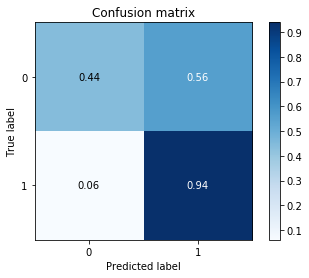

In [226]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

### 7. What about standardizing the data?

In [227]:
scaler = StandardScaler()

In [228]:
X[X.columns] = scaler.fit_transform(X[X.columns])

In [229]:
X.describe()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea,is_female
count,8.147000e+03,8.147000e+03,8.147000e+03,8.147000e+03,8.147000e+03,8.147000e+03,8.147000e+03,8.147000e+03,8.147000e+03
mean,-1.893743e-15,-5.019698e-15,-2.233481e-15,6.212854e-15,1.971065e-16,1.035136e-16,-3.357161e-15,-2.088260e-16,-3.418021e-15
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-1.479604e+00,-1.805176e+00,-2.061635e+00,-1.743362e+00,-1.889727e+00,-2.280936e+00,-2.040676e+00,-1.639504e+00,-9.927841e-01
25%,-9.626946e-01,-8.129169e-01,-5.279277e-01,-6.962782e-01,-5.408327e-01,-8.665596e-01,-8.604823e-01,-7.933614e-01,-9.927841e-01
50%,7.112506e-02,1.793423e-01,-1.669188e-02,-1.727361e-01,1.336146e-01,5.478171e-01,3.197112e-01,-3.628156e-03,-9.927841e-01
75%,5.880349e-01,6.754719e-01,1.005780e+00,8.743481e-01,8.080619e-01,5.478171e-01,3.197112e-01,7.861051e-01,1.007268e+00
max,1.621854e+00,1.667731e+00,1.517016e+00,1.397890e+00,1.482509e+00,1.255005e+00,1.499905e+00,1.745067e+00,1.007268e+00


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)

params = {'n_estimators': 400,
          'max_depth': 1,
          'loss': 'deviance',
         'learning_rate': .1,
         'warm_start': True}

# Initialize and fit the modelexponential.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix
Accuracy : 0.7383406971035837

 -------------------------------------------------- 
 Precision : 0.7127659574468085

 -------------------------------------------------- 
 Recall : 0.9389942291838417


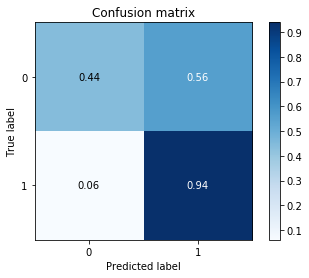

In [231]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

### 8. What about dropping some columns?

In [233]:
X = df.drop(['cntry', 'gndr', 'partner', 'ppltrst', 'pplhlp', 'pplfair'], axis=1)

for column in ['agea']:
    X[column] = winsorize(X[column], (0.05, 0.05))

for column in ['sclact']:
    X[column] = winsorize(X[column], (0, 0.05))

for column in ['tvtot', 'happy', 'sclmeet']:
    X[column] = winsorize(X[column], (0.05, 0))
    

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1312)
params = {'n_estimators': 800,
          'max_depth': 3,
          'max_features': 1,
          'loss': 'deviance',
         'learning_rate': .1,
         'warm_start': True}

# Initialize and fit the modelexponential.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Confusion matrix, without normalization
Accuracy : 0.7363770250368189

 -------------------------------------------------- 
 Precision : 0.7197659297789337

 -------------------------------------------------- 
 Recall : 0.9126133553173948


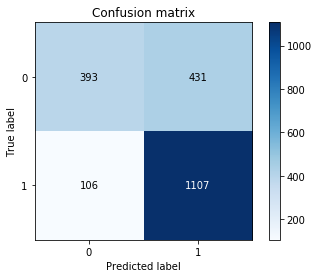

In [266]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)
print('Accuracy : {}'.format(clf.score(X_test, y_test)))
print('\n', '-' * 50, '\n', 'Precision : {}'.format(precision_score(y_test, predict_test)))
print('\n', '-' * 50, '\n', 'Recall : {}'.format(recall_score(y_test, predict_test)))

Overfitting seems to be the main issue here. We can get a pretty good recall score. Precision is better than a random guess but not great. 